### Classifier using three timesteps 
#### rows 0-2, ~27.4 years

In [2]:
import numpy as np
import pandas as pd

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from sklearn.ensemble import GradientBoostingClassifier

In [229]:
planets = pd.read_csv('3ts.csv', skipinitialspace=True)
print(planets.columns)

Index(['run', 'planet', 'initial e', 'final e', 'mean e', 'min e', 'max e',
       'sd e', 'initial pericenter', 'final pericenter', 'mean pericenter',
       'min pericenter', 'max pericenter', 'sd pericenter', 'initial jacobi',
       'final jacobi', 'mean jacobi', 'min jacobi', 'max jacobi', 'sd jacobi',
       'initial mhr1', 'final mhr1', 'mean mhr1', 'min mhr1', 'max mhr1',
       'sd mhr1', 'initial mhr2', 'final mhr2', 'mean mhr2', 'min mhr2',
       'max mhr2', 'sd mhr2', 'initial a1_ratio', 'final a1_ratio',
       'mean a1_ratio', 'min a1_ratio', 'max a1_ratio', 'sd a1_ratio',
       'initial a2_ratio', 'final a2_ratio', 'mean a2_ratio', 'min a2_ratio',
       'max a2_ratio', 'sd a2_ratio', 'initial mass1_ratio',
       'final mass1_ratio', 'mean mass1_ratio', 'min mass1_ratio',
       'max mass1_ratio', 'sd mass1_ratio', 'initial mass2_ratio',
       'final mass2_ratio', 'mean mass2_ratio', 'min mass2_ratio',
       'max mass2_ratio', 'sd mass2_ratio', 'end time', 'fate'],


###### Classifies as type of instability (ejection, remaining, planet-planet collision, central body collision).

In [230]:
fates = list(set(planets['fate']))
types = {fates[i] : i for i in range(len(fates))}
int_dict = {i : fates[i] for i in range(len(fates))}
classes = planets['fate'].map(types)

###### Classifies as either stable or unstable.
Second cell is the hard coded version

In [ ]:
fates = np.sort(list(set(planets['fate']))) [::-1]

types = {fates[i] : i for i in range(len(fates))}

classes = planets['fate'].map(types)

for i in range(len(classes)):
    if classes[i] == 0:
        pass
    else:
        classes[i] = 1

In [234]:
fates = list(set(planets['fate']))

types = {fates[i] : i for i in range(len(fates))}

classes = []

for i in range(len(planets['fate'])):
    if planets['fate'][i] == "remaining":
        classes += [0]
    else:
        classes += [1]
        
classes = np.array(classes)

###### Training

In [235]:
features_train, features_test, classes_train, classes_test = train_test_split(planets, classes, test_size=0.3, random_state=7)

d = ['run', 'planet', 'fate', 'end time']

var = ['e','pericenter','jacobi','mhr1','mhr2','a1_ratio','a2_ratio','mass1_ratio','mass2_ratio'] 

for v in var:
#     d.append('initial ' + str(v))
    d.append('final ' + str(v))
#     d.append('mean ' + str(v))     # getting rid of mean and sd have similar accuracy results
    d.append('min ' + str(v))
#     d.append('max ' + str(v))
    d.append('sd ' + str(v))

ids_train = features_train['planet'].to_numpy()
features_train.drop(d, axis=1, inplace=True)

cols = features_train.columns
features_train = features_train.to_numpy()

ids_test = features_test['planet'].to_numpy()
features_test.drop(d, axis=1, inplace=True)
features_test = features_test.to_numpy()

/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [236]:
classifier = GradientBoostingClassifier(random_state=7)
classifier.fit(features_train, classes_train)

GradientBoostingClassifier(random_state=7)

In [237]:
classes_predict = classifier.predict( features_test )
print('Classifier is ', accuracy_score(classes_test, classes_predict) * 100, '% accurate on testing set' )

Classifier is  85.66666666666667 % accurate on testing set


###### Feature importances

In [238]:
feats=classifier.feature_importances_
inds=np.argsort(feats)[::-1]

for i in range(len(inds)):
    print(cols[inds[i]], feats[inds[i]])

initial a2_ratio 0.21919466678086452
max mass2_ratio 0.12442733217120998
max e 0.10366029797142731
max mass1_ratio 0.0732837774934123
initial mass2_ratio 0.07135568625062806
initial jacobi 0.06878402649500931
initial a1_ratio 0.05140935729638628
initial e 0.043955749445804014
mean mass2_ratio 0.03702341924930321
max a2_ratio 0.024799056304588996
initial mass1_ratio 0.023191850701016755
mean mass1_ratio 0.021221699631246465
mean e 0.020160499576099406
max a1_ratio 0.01858583056862945
mean mhr2 0.015358812983289363
mean a2_ratio 0.012595606774402203
max mhr2 0.010467756688587243
mean a1_ratio 0.008733468320842331
max mhr1 0.008591008138666215
initial mhr2 0.007748444952468841
mean mhr1 0.006749435378408823
initial mhr1 0.0062257072521510705
mean pericenter 0.005972366990071084
mean jacobi 0.00538355452016069
max jacobi 0.005215169156420703
initial pericenter 0.004538517633615439
max pericenter 0.0013669012752899018


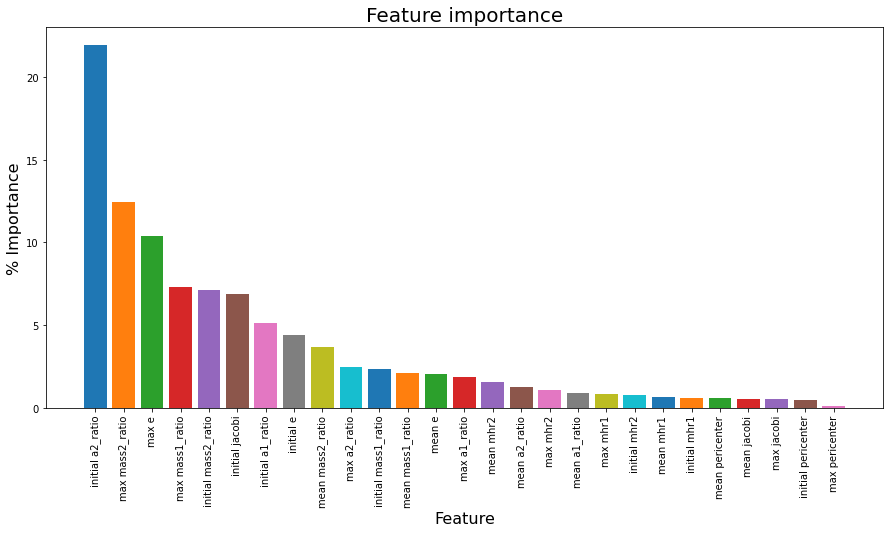

In [239]:
import matplotlib.pyplot as plt
import numpy as np
import pylab


f=plt.figure(figsize=(15,7))

for i in range(len(inds)):
    plt.bar(cols[inds[i]], feats[inds[i]] * 100)
    

 
plt.ylabel('% Importance', size=16)
plt.xlabel('Feature', size=16)
plt.title('Feature importance', size=20)
plt.xticks(rotation = 90)
plt.show()